## Bài 4
* Dùng thuật toán gradient descent với dữ liệu data_square (để tìm đc parabol khá là tricky).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data_square.csv")
data.head()

,Diện tích,Giá nhà
0,30.0000,-100.000
1,32.4138,-190.725
2,34.8276,-269.798
3,37.2414,-337.218
4,39.6552,-392.985


<AxesSubplot:xlabel='Diện tích', ylabel='Giá nhà'>

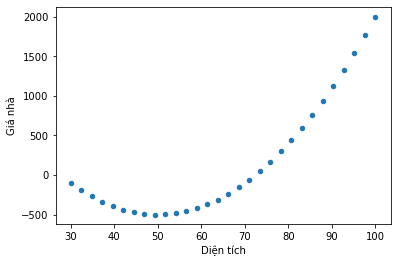

In [7]:
data.plot.scatter(x = "Diện tích", y = "Giá nhà")